In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
fn=pd.read_csv('../final_input_output_FnCas9_EMX1_nodt.csv')
fn.head()

,fn_all_bp20_shear,fn_all_bp20_stretch,fn_all_bp20_stagger,fn_all_bp20_buckle,fn_all_bp20_propeller,fn_all_bp20_opening,fn_all_bp19_shear,fn_all_bp19_stretch,fn_all_bp19_stagger,fn_all_bp19_buckle,...,Fn-hy-HNH_native,Fn-hy-HNH_non-native,Fn-hy-REC1_native,Fn-hy-REC1_non-native,Fn-hy-REC2_native,Fn-hy-REC2_non-native,Fn-hy-REC3_native,Fn-hy-REC3_non-native,Fn-hy-RuvC_native,Fn-hy-RuvC_non-native
0,-0.2235,-0.1560,0.1115,-5.2780,-6.1620,-2.6378,0.8102,0.1117,0.0089,4.0798,...,203,0,595,0,66,0,948,0,177,0
1,-0.0246,-0.0426,0.0525,-1.9449,-9.4976,-0.4529,0.6822,0.1572,0.4577,4.0702,...,149,50,459,131,45,44,743,255,140,55
2,-0.6886,-0.2216,-0.3474,-9.1124,-10.7522,0.9964,0.8532,-0.0798,0.4607,8.6720,...,133,37,457,182,46,30,712,288,140,46
3,-0.2224,-0.1921,-0.4324,-13.3789,-32.2909,0.1517,0.0591,-0.0899,0.1444,-11.1322,...,96,37,473,138,47,53,675,354,135,65
4,-0.4906,0.0171,-0.6700,-19.3168,-12.3558,3.4286,0.3124,0.0721,-0.6816,-10.5390,...,114,23,443,170,44,84,682,359,134,48


In [3]:
data = pd.read_csv('fn_emx1_all_features_withlabels.csv')
dna=pd.read_csv('fn_emx1_onlyDNA_features_withlabels.csv')
prot=pd.read_csv('fn_emx1_only_protein_withlabels.csv')
data.head()

,States,Label,System,sys_labels,fn_all_bp20_shear,fn_all_bp20_stretch,fn_all_bp20_stagger,fn_all_bp20_buckle,fn_all_bp20_propeller,fn_all_bp20_opening,...,Fn-hy-HNH_native,Fn-hy-HNH_non-native,Fn-hy-REC1_native,Fn-hy-REC1_non-native,Fn-hy-REC2_native,Fn-hy-REC2_non-native,Fn-hy-REC3_native,Fn-hy-REC3_non-native,Fn-hy-RuvC_native,Fn-hy-RuvC_non-native
0,3,Fn_native-1,Fn_native,0,-0.2235,-0.1560,0.1115,-5.2780,-6.1620,-2.6378,...,203,0,595,0,66,0,948,0,177,0
1,3,Fn_native-2,Fn_native,0,-0.0246,-0.0426,0.0525,-1.9449,-9.4976,-0.4529,...,149,50,459,131,45,44,743,255,140,55
2,3,Fn_native-3,Fn_native,0,-0.6886,-0.2216,-0.3474,-9.1124,-10.7522,0.9964,...,133,37,457,182,46,30,712,288,140,46
3,3,Fn_native-4,Fn_native,0,-0.2224,-0.1921,-0.4324,-13.3789,-32.2909,0.1517,...,96,37,473,138,47,53,675,354,135,65
4,3,Fn_native-5,Fn_native,0,-0.4906,0.0171,-0.6700,-19.3168,-12.3558,3.4286,...,114,23,443,170,44,84,682,359,134,48


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64816 entries, 0 to 64815
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   States                         64816 non-null  int64  
 1   Label                          64816 non-null  object 
 2   System                         64816 non-null  object 
 3   sys_labels                     64816 non-null  int64  
 4   fn_all_bp20_shear              52080 non-null  float64
 5   fn_all_bp20_stretch            52080 non-null  float64
 6   fn_all_bp20_stagger            52080 non-null  float64
 7   fn_all_bp20_buckle             52080 non-null  float64
 8   fn_all_bp20_propeller          52080 non-null  float64
 9   fn_all_bp20_opening            52080 non-null  float64
 10  fn_all_bp19_shear              55485 non-null  float64
 11  fn_all_bp19_stretch            55485 non-null  float64
 12  fn_all_bp19_stagger            55485 non-null 

In [5]:
data.shape

(64816, 46)

In [6]:
data['Label'].unique()

array(['Fn_native-1', 'Fn_native-2', 'Fn_native-3', ..., 'Fn_mm20-14988',
       'Fn_mm20-14989', 'Fn_mm20-14990'], dtype=object)

In [7]:
data=data.drop(['Label','System','sys_labels'], axis=1)
data.head()

,States,fn_all_bp20_shear,fn_all_bp20_stretch,fn_all_bp20_stagger,fn_all_bp20_buckle,fn_all_bp20_propeller,fn_all_bp20_opening,fn_all_bp19_shear,fn_all_bp19_stretch,fn_all_bp19_stagger,...,Fn-hy-HNH_native,Fn-hy-HNH_non-native,Fn-hy-REC1_native,Fn-hy-REC1_non-native,Fn-hy-REC2_native,Fn-hy-REC2_non-native,Fn-hy-REC3_native,Fn-hy-REC3_non-native,Fn-hy-RuvC_native,Fn-hy-RuvC_non-native
0,3,-0.2235,-0.1560,0.1115,-5.2780,-6.1620,-2.6378,0.8102,0.1117,0.0089,...,203,0,595,0,66,0,948,0,177,0
1,3,-0.0246,-0.0426,0.0525,-1.9449,-9.4976,-0.4529,0.6822,0.1572,0.4577,...,149,50,459,131,45,44,743,255,140,55
2,3,-0.6886,-0.2216,-0.3474,-9.1124,-10.7522,0.9964,0.8532,-0.0798,0.4607,...,133,37,457,182,46,30,712,288,140,46
3,3,-0.2224,-0.1921,-0.4324,-13.3789,-32.2909,0.1517,0.0591,-0.0899,0.1444,...,96,37,473,138,47,53,675,354,135,65
4,3,-0.4906,0.0171,-0.6700,-19.3168,-12.3558,3.4286,0.3124,0.0721,-0.6816,...,114,23,443,170,44,84,682,359,134,48


In [8]:
dna_2=data[['sgRNA-tDNA cont','LIE','Fn-ntDNA-tDNA_native','Fn-ntDNA-tDNA-RuvC_non-native','fn_all_bp20_shear',
       'fn_all_bp20_stretch', 'fn_all_bp20_stagger', 'fn_all_bp20_buckle',
       'fn_all_bp20_propeller', 'fn_all_bp20_opening', 'fn_all_bp19_shear',
       'fn_all_bp19_stretch', 'fn_all_bp19_stagger', 'fn_all_bp19_buckle',
       'fn_all_bp19_propeller', 'fn_all_bp19_opening', 'fn_all_bp18_shear',
       'fn_all_bp18_stretch', 'fn_all_bp18_stagger', 'fn_all_bp18_buckle',
       'fn_all_bp18_propeller', 'fn_all_bp18_opening', 'fn_all_bp17_shear',
       'fn_all_bp17_stretch', 'fn_all_bp17_stagger', 'fn_all_bp17_buckle',
       'fn_all_bp17_propeller', 'fn_all_bp17_opening','States']]
dna_2.head()


,sgRNA-tDNA cont,LIE,Fn-ntDNA-tDNA_native,Fn-ntDNA-tDNA-RuvC_non-native,fn_all_bp20_shear,fn_all_bp20_stretch,fn_all_bp20_stagger,fn_all_bp20_buckle,fn_all_bp20_propeller,fn_all_bp20_opening,...,fn_all_bp18_buckle,fn_all_bp18_propeller,fn_all_bp18_opening,fn_all_bp17_shear,fn_all_bp17_stretch,fn_all_bp17_stagger,fn_all_bp17_buckle,fn_all_bp17_propeller,fn_all_bp17_opening,States
0,875.0,-410.4885,438,0,-0.2235,-0.1560,0.1115,-5.2780,-6.1620,-2.6378,...,0.5040,-11.8248,-2.6528,-0.2399,0.2895,-0.2006,2.3748,-21.4338,9.0367,3
1,698.0,-449.4299,342,66,-0.0246,-0.0426,0.0525,-1.9449,-9.4976,-0.4529,...,-2.7476,-18.4257,-5.6445,0.0357,-0.1001,0.1352,-12.4686,-20.1810,-1.2443,3
2,653.0,-417.8293,329,45,-0.6886,-0.2216,-0.3474,-9.1124,-10.7522,0.9964,...,-9.3141,-20.4910,2.7853,0.0121,0.1563,0.1135,-7.5888,-12.7424,-8.7436,3
3,667.0,-448.9658,325,66,-0.2224,-0.1921,-0.4324,-13.3789,-32.2909,0.1517,...,-1.4893,-15.1497,1.8969,0.2057,0.1120,0.0894,-4.0861,-10.4329,6.8023,3
4,684.0,-448.3792,349,71,-0.4906,0.0171,-0.6700,-19.3168,-12.3558,3.4286,...,6.3332,-4.2759,-2.5572,0.2387,-0.1891,-0.0572,3.6558,-14.0138,-0.8260,3


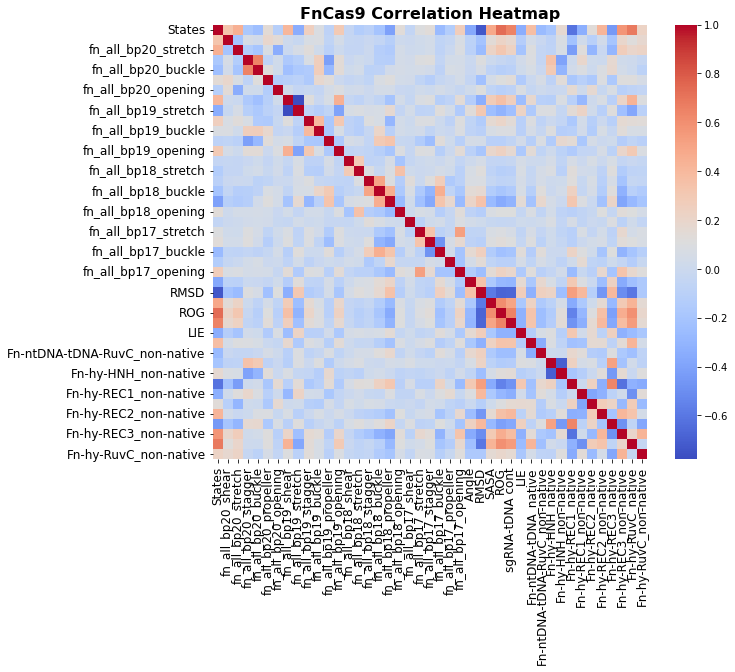

In [9]:
# Create a correlation matrix
correlation_matrix = data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title('FnCas9 Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../../figures/FnCas9_all_coor_plot.svg')
plt.show()

In [9]:
data['States'].value_counts()

3    45333
1    13762
2     5506
0      215
Name: States, dtype: int64

In [10]:
data.shape

(64816, 43)

In [11]:

# Assuming the dataframe is stored in a variable called 'df'
# You may need to adjust the code if your dataframe has different column names

# Step 1: Prepare the data
# dropping the rows having NaN values
data = data.dropna()
 
# To reset the indices
data = data.reset_index(drop=True)
X = data.iloc[:, 1:]  
y = data['States']    # Assuming 'states' is the target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
y.shape

(52080,)

In [13]:
y.value_counts()

3    44293
2     5506
1     2252
0       29
Name: States, dtype: int64

In [12]:
# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict_fn_all = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=48)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict_fn_all[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|███████████████▍                                                             | 1/5 [04:18<17:14, 258.52s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score for RandomForestClassifier: 0.9590773343029341



Grid Search Progress:  40%|████████████████████████████▊                                           | 2/5 [1:52:05<3:15:31, 3910.46s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.9651258182590713



Grid Search Progress:  60%|███████████████████████████████████████████▏                            | 3/5 [1:53:38<1:12:14, 2167.25s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 200}
Best score for AdaBoostClassifier: 0.9036815912144215



Grid Search Progress:  80%|███████████████████████████████████████████████████████████▏              | 4/5 [3:21:40<56:37, 3397.17s/it]

Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVC: 0.9635175321355953



Grid Search Progress: 100%|██████████████████████████████████████████████████████████████████████████| 5/5 [3:41:23<00:00, 2656.64s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best score for XGBClassifier: 0.9666619085259545



In [13]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict_fn_all[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict_fn_all[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict_fn_all[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict_fn_all[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict_fn_all[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest recall:", rf_recall)
print("Gradient Boosting recall:", gb_recall)
print("AdaBoost recall:", ab_recall)
print("Support Vector Machine recall:", svm_recall)
print("XGBoost recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)


grid_fn_all_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_fn_all_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_fn_all_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_fn_all_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
fn_all=pd.DataFrame(list(zip(models,grid_fn_all_accuracy,grid_fn_all_precision,grid_fn_all_recall, grid_fn_all_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
fn_all.head()

Random Forest Precision: 0.9553404917609951
Gradient Boosting Precision: 0.9621640937051577
AdaBoost Precision: 0.9229087116002934
Support Vector Machine Precision: 0.9578959772694992
XGBoost Precision: 0.9640625020269128
Random Forest recall: 0.9577572964669739
Gradient Boosting recall: 0.9633256528417818
AdaBoost recall: 0.9083141321044547
Support Vector Machine recall: 0.9599654377880185
XGBoost recall: 0.9656298003072197
Random Forest F1-score: 0.9558049466495898
Gradient Boosting F1-score: 0.9624863390136205
AdaBoost F1-score: 0.9135883499283133
Support Vector Machine F1-score: 0.9585275896375203
XGBoost F1-score: 0.9646485359180655
Random Forest Accuracy: 0.9577572964669739
Gradient Boosting Accuracy: 0.9633256528417818
AdaBoost Accuracy: 0.9083141321044547
Support Vector Machine Accuracy: 0.9599654377880185
XGBoost Accuracy: 0.9656298003072197


,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.957757,0.955340,0.957757,0.955805
1,Gradient Boosting,0.963326,0.962164,0.963326,0.962486
2,ADA Boosting,0.908314,0.922909,0.908314,0.913588
3,Support-vector Machine,0.959965,0.957896,0.959965,0.958528
4,XG-Boost,0.965630,0.964063,0.965630,0.964649


## Protein+DNA RFE feature selection

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE


# Initialize the logistic regression model
model = RandomForestClassifier()

# Initialize the RFE object
rfe = RFE(estimator=model, n_features_to_select=20)

# Perform RFE feature selection
X_selected = rfe.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

Selected Features:
fn_all_bp20_stretch
fn_all_bp20_stagger
fn_all_bp20_buckle
fn_all_bp20_propeller
fn_all_bp20_opening
fn_all_bp19_propeller
Angle
RMSD
SASA
ROG
Fn-hy-HNH_native
Fn-hy-HNH_non-native
Fn-hy-REC1_native
Fn-hy-REC1_non-native
Fn-hy-REC2_native
Fn-hy-REC2_non-native
Fn-hy-REC3_native
Fn-hy-REC3_non-native
Fn-hy-RuvC_native
Fn-hy-RuvC_non-native


In [47]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(41664, 45) (41664,) (10416, 45) (10416,)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Select the top 20 features
top_features = selected_feature_names
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the logistic regression model to the training data
logreg.fit(X_train_scaled, y_train)

# Evaluate the logistic regression model
accuracy = logreg.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9423963133640553


/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Initialize the logistic regression model with multi_class='ovr'
logreg = LogisticRegression(multi_class='ovr')

# Fit the logistic regression model to the training data
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print('F1-score', f1)

Precision: 0.933315654319661
Recall: 0.9384600614439325
F1-score 0.9329569150087536


/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Fit the models to the training data
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
ab_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)
ab_pred = ab_model.predict(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)


from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Precision: 0.9590690383817528
Gradient Boosting Precision: 0.9552982986302326
AdaBoost Precision: 0.7926849212523321
Support Vector Machine Precision: 0.962112740659968
XGBoost Precision: 0.9619179533952603
Random Forest Recall: 0.9611175115207373
Gradient Boosting Recall: 0.9572772657450077
AdaBoost Recall: 0.8870967741935484
Support Vector Machine Recall: 0.9636136712749616
XGBoost Recall: 0.9636136712749616
Random Forest F1-score: 0.9596290272783519
Gradient Boosting F1-score: 0.9559457503538399
AdaBoost F1-score: 0.8371342216256206
Support Vector Machine F1-score: 0.9627405435898871
XGBoost F1-score: 0.9625388198754431
Random Forest Accuracy: 0.9611175115207373
Gradient Boosting Accuracy: 0.9572772657450077
AdaBoost Accuracy: 0.8870967741935484
Support Vector Machine Accuracy: 0.9636136712749616
XGBoost Accuracy: 0.9636136712749616


/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/m

## Hyperparameter Tuning

In [77]:
# Random Forest
rf_model = RandomForestClassifier()
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf_model, rf_params, cv=10,n_jobs=100)
rf_grid.fit(X_train_scaled, y_train)
rf_best_model = rf_grid.best_estimator_

In [78]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}
gb_grid = GridSearchCV(gb_model, gb_params, cv=10,n_jobs=100)
gb_grid.fit(X_train_scaled, y_train)
gb_best_model = gb_grid.best_estimator_

In [79]:
# AdaBoost
ab_model = AdaBoostClassifier()
ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}
ab_grid = GridSearchCV(ab_model, ab_params, cv=10, n_jobs=100)
ab_grid.fit(X_train_scaled, y_train)
ab_best_model = ab_grid.best_estimator_

In [80]:
# Support Vector Machine
svm_model = SVC()
svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(svm_model, svm_params, cv=10, n_jobs=100)
svm_grid.fit(X_train_scaled, y_train)
svm_best_model = svm_grid.best_estimator_


In [81]:
# XGBoost
xgb_model = XGBClassifier()
xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=100)
xgb_grid.fit(X_train_scaled, y_train)
xgb_best_model = xgb_grid.best_estimator_

In [82]:
grid_rfe_accuracy=[]
grid_rfe_f1=[]
grid_rfe_precision=[]
grid_rfe_recall=[]

# Make predictions on the test set using the best models
rf_pred = rf_best_model.predict(X_test_scaled)
gb_pred = gb_best_model.predict(X_test_scaled)
ab_pred = ab_best_model.predict(X_test_scaled)
svm_pred = svm_best_model.predict(X_test_scaled)
xgb_pred = xgb_best_model.predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Accuracy: 0.9615015360983102
Gradient Boosting Accuracy: 0.9633256528417818
AdaBoost Accuracy: 0.9119623655913979
Support Vector Machine Accuracy: 0.9654377880184332
XGBoost Accuracy: 0.964189708141321


In [83]:
# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

grid_rfe_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_rfe_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_rfe_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_rfe_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
rfe=pd.DataFrame(list(zip(models,grid_rfe_accuracy,grid_rfe_precision,grid_rfe_recall, grid_rfe_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
rfe.head()

Random Forest Precision: 0.9594578786695016
Gradient Boosting Precision: 0.9619568208476893
AdaBoost Precision: 0.9234320803114054
Support Vector Machine Precision: 0.9641372746816338
XGBoost Precision: 0.9625846553657664
Random Forest Recall: 0.9615015360983102
Gradient Boosting Recall: 0.9633256528417818
AdaBoost Recall: 0.9119623655913979
Support Vector Machine Recall: 0.9654377880184332
XGBoost Recall: 0.964189708141321
Random Forest F1-score: 0.9599721293994877
Gradient Boosting F1-score: 0.9623716607448641
AdaBoost F1-score: 0.9162392343855965
Support Vector Machine F1-score: 0.9647144430245093
XGBoost F1-score: 0.9632037991444615


/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/m

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.961502,0.959458,0.961502,0.959972
1,Gradient Boosting,0.963326,0.961957,0.963326,0.962372
2,ADA Boosting,0.911962,0.923432,0.911962,0.916239
3,Support-vector Machine,0.965438,0.964137,0.965438,0.964714
4,XG-Boost,0.964190,0.962585,0.964190,0.963204


In [84]:
rfe['Models']=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
rfe.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.961502,0.959458,0.961502,0.959972
1,Gradient Boosting,0.963326,0.961957,0.963326,0.962372
2,ADA Boosting,0.911962,0.923432,0.911962,0.916239
3,Support-vector Machine,0.965438,0.964137,0.965438,0.964714
4,XG-Boost,0.964190,0.962585,0.964190,0.963204


In [ ]:
import pandas as pd

# Assuming y_test, rf_pred, gb_pred, ab_pred, svm_pred, and xgb_pred are available

# Create a DataFrame with true labels and predictions
df_predictions = pd.DataFrame({'True Label': y_test,
                               'Random Forest': rf_pred,
                               'Gradient Boosting': gb_pred,
                               'AdaBoost': ab_pred,
                               'SVM': svm_pred,
                               'XGBoost': xgb_pred})

# Display the DataFrame
print(df_predictions)

## Protein+DNA - Extra-Tree Classifier feature selection

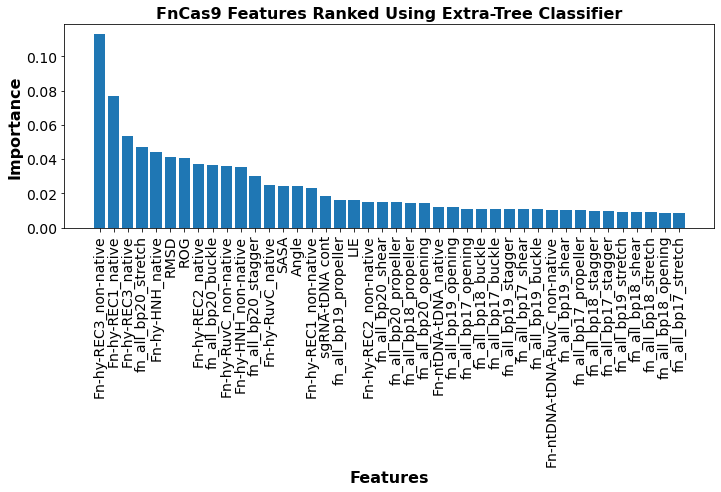

In [15]:
# Train the ExtraTreesClassifier model
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Extract feature importances
importances = model.feature_importances_

# Step 5: Visualize the feature importances
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Features" ,fontsize=16, fontweight='bold')
plt.ylabel("Importance", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.title('FnCas9 Features Ranked Using Extra-Tree Classifier', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('../../figures/FnCas9_extra-tree-feature-ranking_all_plot.svg')
plt.show()
plt.show()

In [16]:
li1=list(X_train.columns[indices])
li2=list(importances[indices])
xt_imp=pd.DataFrame({'Feature':li1,'Importance':li2})
xt_imp.to_csv('xt_imp_fncas9.csv', index=False)

In [87]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Select the top 25 features
top_features = X.columns[indices][:25]
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]



# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=100)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|███████████████████████                                                                                            | 1/5 [02:20<09:22, 140.53s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score for RandomForestClassifier: 0.9613575781916325



Grid Search Progress:  40%|████████████████████████████████████████████▊                                                                   | 2/5 [46:17<1:20:27, 1609.30s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.9648377779321582



Grid Search Progress:  60%|█████████████████████████████████████████████████████████████████████                                              | 3/5 [47:10<29:57, 898.61s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 200}
Best score for AdaBoostClassifier: 0.9057214280274766



Grid Search Progress:  80%|██████████████████████████████████████████████████████████████████████████████████████████▍                      | 4/5 [1:04:41<15:58, 958.68s/it]

Best parameters for SVC: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVC: 0.9658218374695171



/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Grid Search Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [1:11:29<00:00, 857.83s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for XGBClassifier: 0.9663978950814995



In [88]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Precision: 0.9584115509596451
Gradient Boosting Precision: 0.9626358155920466
AdaBoost Precision: 0.9229087116002934
Support Vector Machine Precision: 0.9623372108785159
XGBoost Precision: 0.9648730844763826
Random Forest Recall: 0.9605414746543779
Gradient Boosting Recall: 0.9636136712749616
AdaBoost Recall: 0.9083141321044547
Support Vector Machine Recall: 0.9639016897081413
XGBoost Recall: 0.9663978494623656
Random Forest F1-score: 0.9589274780305665
Gradient Boosting F1-score: 0.9629227993020811
AdaBoost F1-score: 0.9135883499283133
Support Vector Machine F1-score: 0.9629642787154294
XGBoost F1-score: 0.9654457160762927
Random Forest Accuracy: 0.9605414746543779
Gradient Boosting Accuracy: 0.9636136712749616
AdaBoost Accuracy: 0.9083141321044547
Support Vector Machine Accuracy: 0.9639016897081413
XGBoost Accuracy: 0.9663978494623656


/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/m

In [89]:
grid_et_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_et_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_et_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_et_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
et=pd.DataFrame(list(zip(models,grid_et_accuracy,grid_et_precision,grid_et_recall, grid_et_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
et.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.960541,0.958412,0.960541,0.958927
1,Gradient Boosting,0.963614,0.962636,0.963614,0.962923
2,ADA Boosting,0.908314,0.922909,0.908314,0.913588
3,Support-vector Machine,0.963902,0.962337,0.963902,0.962964
4,XG-Boost,0.966398,0.964873,0.966398,0.965446


In [90]:
rfe.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.961502,0.959458,0.961502,0.959972
1,Gradient Boosting,0.963326,0.961957,0.963326,0.962372
2,ADA Boosting,0.911962,0.923432,0.911962,0.916239
3,Support-vector Machine,0.965438,0.964137,0.965438,0.964714
4,XG-Boost,0.964190,0.962585,0.964190,0.963204


In [91]:
 X.columns[indices][:25]

Index(['Fn-hy-REC2_native', 'Fn-hy-REC2_non-native', 'Fn-hy-REC3_non-native',
       'Fn-hy-REC1_native', 'Fn-hy-REC3_native', 'Fn-hy-HNH_non-native',
       'fn_all_bp20_stretch', 'Fn-hy-HNH_native', 'ROG', 'RMSD',
       'Fn-hy-RuvC_non-native', 'fn_all_bp20_buckle', 'Fn-hy-RuvC_native',
       'fn_all_bp20_stagger', 'SASA', 'Fn-hy-REC1_non-native', 'Angle',
       'fn_all_bp19_propeller', 'sgRNA-tDNA cont', 'LIE', 'fn_all_bp20_shear',
       'fn_all_bp20_propeller', 'fn_all_bp20_opening', 'fn_all_bp18_propeller',
       'fn_all_bp19_opening'],
      dtype='object')

## Feature selection and classification using Protein features only

In [33]:
prot=prot.drop(['Label','System','sys_labels'], axis=1)
prot.head()

,States,SASA,ROG,RMSD,Angle,Fn-hy-HNH_native,Fn-hy-HNH_non-native,Fn-hy-REC1_native,Fn-hy-REC1_non-native,Fn-hy-REC2_native,Fn-hy-REC2_non-native,Fn-hy-REC3_native,Fn-hy-REC3_non-native,Fn-hy-RuvC_native,Fn-hy-RuvC_non-native
0,3,16966.1651,42.3083,0.0000,74.9050,203,0,595,0,66,0,948,0,177,0
1,3,16274.8351,42.3648,3.6146,71.9931,149,50,459,131,45,44,743,255,140,55
2,3,15949.5076,41.9093,3.9389,70.8587,133,37,457,182,46,30,712,288,140,46
3,3,16626.5791,42.4010,3.7250,69.3978,96,37,473,138,47,53,675,354,135,65
4,3,15875.5775,41.7911,3.8886,68.9098,114,23,443,170,44,84,682,359,134,48


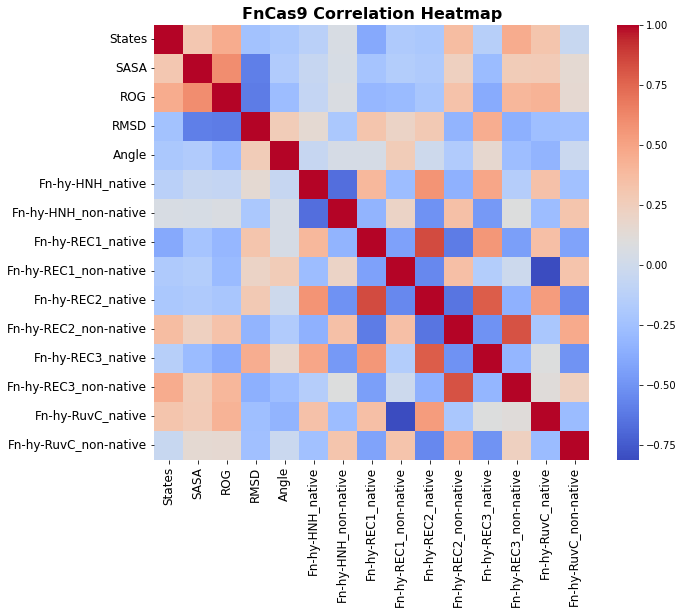

In [18]:
# Create a correlation matrix
correlation_matrix = prot.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title('FnCas9 Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../../figures/FnCas9_prot_coor_plot.svg')
plt.show()

In [34]:
prot = prot.dropna()
 
# To reset the indices
prot = prot.reset_index(drop=True)
X = prot.iloc[:, 1:]  
y = prot['States']    # Assuming 'states' is the target variable column

# Split the prot into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict_fn_prot = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=48)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict_fn_prot[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


## RFE using only Protein Features

In [95]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE


# Initialize the logistic regression model
model = RandomForestClassifier()

# Initialize the RFE object
rfe = RFE(estimator=model, n_features_to_select=20)

# Perform RFE feature selection
X_selected = rfe.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

Selected Features:
SASA
ROG
RMSD
Angle
Fn-hy-HNH_native
Fn-hy-HNH_non-native
Fn-hy-REC1_native
Fn-hy-REC1_non-native
Fn-hy-REC2_native
Fn-hy-REC2_non-native
Fn-hy-REC3_native
Fn-hy-REC3_non-native
Fn-hy-RuvC_native
Fn-hy-RuvC_non-native


In [96]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Select the top 20 features
top_features = selected_feature_names
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)


# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=100)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|███████████████████████                                                                                            | 1/5 [02:34<10:16, 154.11s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score for RandomForestClassifier: 0.9598850712222493



Grid Search Progress:  40%|████████████████████████████████████████████▊                                                                   | 2/5 [52:50<1:31:53, 1837.81s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.9603241393164046



Grid Search Progress:  60%|████████████████████████████████████████████████████████████████████▍                                             | 3/5 [53:50<34:12, 1026.12s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 200}
Best score for AdaBoostClassifier: 0.8560117771412286



Grid Search Progress:  80%|█████████████████████████████████████████████████████████████████████████████████████████▌                      | 4/5 [2:58:18<59:29, 3569.27s/it]

Best parameters for SVC: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVC: 0.9623687610008919



Grid Search Progress: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [3:06:53<00:00, 2242.73s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for XGBClassifier: 0.9615157865649049



In [97]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Precision: 0.960797840118893
Gradient Boosting Precision: 0.9608890063155088
AdaBoost Precision: 0.8729706613814413
Support Vector Machine Precision: 0.9626456910896609
XGBoost Precision: 0.963240608917831
Random Forest Recall: 0.9615674075560684
Gradient Boosting Recall: 0.9613165420701419
AdaBoost Recall: 0.8743163915508504
Support Vector Machine Recall: 0.96357433144348
XGBoost Recall: 0.9640258893181476
Random Forest F1-score: 0.9606937813705692
Gradient Boosting F1-score: 0.961048513402722
AdaBoost F1-score: 0.8660223013273913
Support Vector Machine F1-score: 0.9629508327084431
XGBoost F1-score: 0.9633826239541797
Random Forest Accuracy: 0.9615674075560684
Gradient Boosting Accuracy: 0.9613165420701419
AdaBoost Accuracy: 0.8743163915508504
Support Vector Machine Accuracy: 0.96357433144348
XGBoost Accuracy: 0.9640258893181476


In [98]:
grid_rfe_prot_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_rfe_prot_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_rfe_prot_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_rfe_prot_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
rfe_prot=pd.DataFrame(list(zip(models,grid_rfe_prot_accuracy,grid_rfe_prot_precision,grid_rfe_prot_recall, grid_rfe_prot_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
rfe_prot.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.961567,0.960798,0.961567,0.960694
1,Gradient Boosting,0.961317,0.960889,0.961317,0.961049
2,ADA Boosting,0.874316,0.872971,0.874316,0.866022
3,Support-vector Machine,0.963574,0.962646,0.963574,0.962951
4,XG-Boost,0.964026,0.963241,0.964026,0.963383


## Extra-tree Classifier using only Protein Features

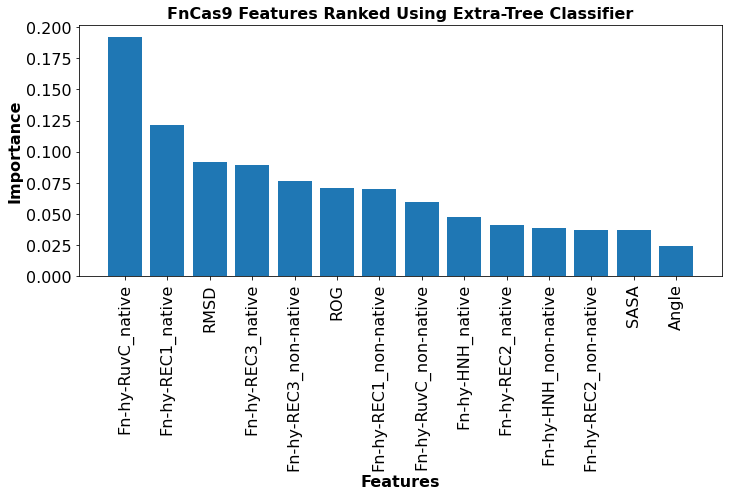

In [35]:
# Train the ExtraTreesClassifier model
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Extract feature importances
importances = model.feature_importances_

# Step 5: Visualize the feature importances
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Features" ,fontsize=16, fontweight='bold')
plt.ylabel("Importance", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.title('FnCas9 Features Ranked Using Extra-Tree Classifier', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('../../figures/FnCas9_extra-tree-feature-ranking_prot_plot.svg')
plt.show()
plt.show()

In [100]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Select the top 25 features
top_features = X.columns[indices][:5]
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]



# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=100)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:   0%|                                                                                                                            | 0/5 [00:00<?, ?it/s]/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Grid Search Progress:  20%|███████████████████████▏                                                                                            | 1/5 [01:09<04:37, 69.48s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best score for RandomForestClassifier: 0.9358387115471064



Grid Search Progress:  40%|██████████████████████████████████████████████                                                                     | 2/5 [14:29<24:58, 499.42s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.9357383839172713



Grid Search Progress:  60%|█████████████████████████████████████████████████████████████████████                                              | 3/5 [14:55<09:26, 283.17s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 200}
Best score for AdaBoostClassifier: 0.8556858543343946



Grid Search Progress:  80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 4/5 [34:52<10:43, 643.95s/it]

Best parameters for SVC: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVC: 0.934722307267711



Grid Search Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [37:46<00:00, 453.32s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score for XGBClassifier: 0.9358387209868934



In [101]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Precision: 0.9325169321530493
Gradient Boosting Precision: 0.9335337554020776
AdaBoost Precision: 0.8726328932684384
Support Vector Machine Precision: 0.9336821802549461
XGBoost Precision: 0.9346221992522062
Random Forest Recall: 0.9352767046309769
Gradient Boosting Recall: 0.935477397019718
AdaBoost Recall: 0.8731122372184035
Support Vector Machine Recall: 0.936330339671868
XGBoost Recall: 0.937383974712759
Random Forest F1-score: 0.9335873844440791
Gradient Boosting F1-score: 0.934245068497646
AdaBoost F1-score: 0.8647025122362625
Support Vector Machine F1-score: 0.9344341637725512
XGBoost F1-score: 0.9357657408643948
Random Forest Accuracy: 0.9352767046309769
Gradient Boosting Accuracy: 0.935477397019718
AdaBoost Accuracy: 0.8731122372184035
Support Vector Machine Accuracy: 0.936330339671868
XGBoost Accuracy: 0.937383974712759


/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
grid_et_prot_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_et_prot_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_et_prot_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_et_prot_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
et_prot=pd.DataFrame(list(zip(models,grid_et_prot_accuracy,grid_et_prot_precision,grid_et_prot_recall, grid_et_prot_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
et_prot.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.935277,0.932517,0.935277,0.933587
1,Gradient Boosting,0.935477,0.933534,0.935477,0.934245
2,ADA Boosting,0.873112,0.872633,0.873112,0.864703
3,Support-vector Machine,0.936330,0.933682,0.936330,0.934434
4,XG-Boost,0.937384,0.934622,0.937384,0.935766


## Feature selection and classification using DNA features only

In [11]:
# dna=dna.drop(['Label','System','sys_labels'], axis=1)
# dna.head()

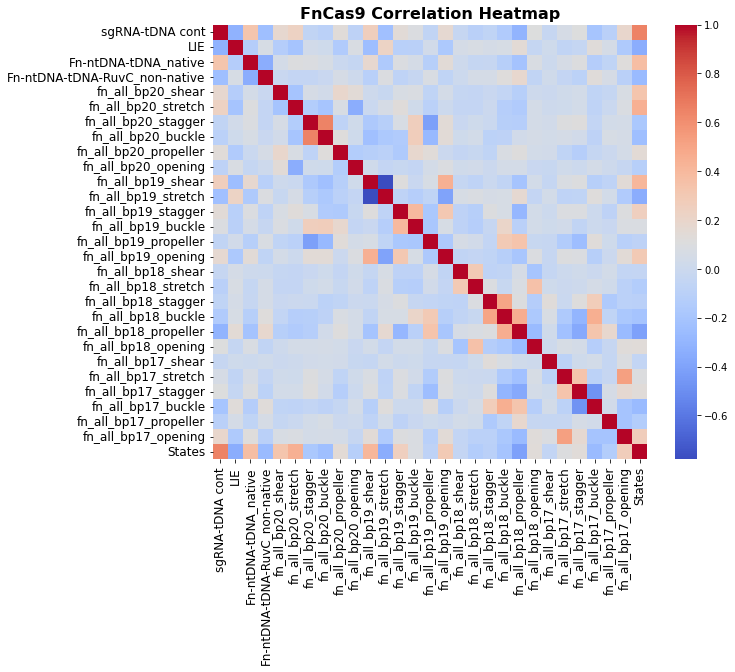

In [12]:
# Create a correlation matrix
correlation_matrix = dna_2.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title('FnCas9 Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../../figures/FnCas9_dna_coor_plot.svg')
plt.show()

## Before Feature Selection

In [26]:
dna_2 = dna_2.dropna()
 
# To reset the indices
dna_2 = dna_2.reset_index(drop=True)
X = dna_2.iloc[:, :-1]  
y = dna_2['States']    # Assuming 'states' is the target variable column

# Split the prot into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
X_train.columns

Index(['sgRNA-tDNA cont', 'LIE', 'Fn-ntDNA-tDNA_native',
       'Fn-ntDNA-tDNA-RuvC_non-native', 'fn_all_bp20_shear',
       'fn_all_bp20_stretch', 'fn_all_bp20_stagger', 'fn_all_bp20_buckle',
       'fn_all_bp20_propeller', 'fn_all_bp20_opening', 'fn_all_bp19_shear',
       'fn_all_bp19_stretch', 'fn_all_bp19_stagger', 'fn_all_bp19_buckle',
       'fn_all_bp19_propeller', 'fn_all_bp19_opening', 'fn_all_bp18_shear',
       'fn_all_bp18_stretch', 'fn_all_bp18_stagger', 'fn_all_bp18_buckle',
       'fn_all_bp18_propeller', 'fn_all_bp18_opening', 'fn_all_bp17_shear',
       'fn_all_bp17_stretch', 'fn_all_bp17_stagger', 'fn_all_bp17_buckle',
       'fn_all_bp17_propeller', 'fn_all_bp17_opening'],
      dtype='object')

In [28]:
X_train

,sgRNA-tDNA cont,LIE,Fn-ntDNA-tDNA_native,Fn-ntDNA-tDNA-RuvC_non-native,fn_all_bp20_shear,fn_all_bp20_stretch,fn_all_bp20_stagger,fn_all_bp20_buckle,fn_all_bp20_propeller,fn_all_bp20_opening,...,fn_all_bp18_stagger,fn_all_bp18_buckle,fn_all_bp18_propeller,fn_all_bp18_opening,fn_all_bp17_shear,fn_all_bp17_stretch,fn_all_bp17_stagger,fn_all_bp17_buckle,fn_all_bp17_propeller,fn_all_bp17_opening
50239,632.0,-410.0010,343,106,-0.2200,-1.6100,-0.5000,-4.1300,-18.1500,14.3900,...,-0.1200,35.2900,14.5400,-0.8100,-0.1900,0.1200,-1.1200,34.7200,-20.9700,6.4800
33231,674.0,-452.4573,322,88,-0.3258,-0.1130,-0.8177,-12.5705,4.9969,-1.7846,...,-0.2741,9.4909,-11.4391,-1.3879,0.0960,-0.2550,-1.0811,-1.0382,-7.3111,8.3839
43650,702.0,-458.8838,337,93,0.5632,-0.0176,-0.1641,-20.6091,-9.2743,-8.7081,...,-0.5387,-3.5647,-18.6731,-2.9250,-0.3636,0.5940,0.1590,-3.8561,-13.4788,17.9479
38836,656.0,-433.8120,308,64,-0.8380,-0.0707,-0.9802,-37.2419,-27.4461,5.0804,...,-0.9574,-26.7250,-21.8295,1.9307,0.7108,-0.2316,-0.5586,-22.5135,-21.7411,13.7578
2388,675.0,-450.3133,352,91,-0.5177,-0.1460,-0.4708,-10.2132,-9.0658,-0.4881,...,-0.3286,9.2225,-1.6209,1.3293,-0.2421,0.1443,-0.1554,-11.1967,-14.7552,0.5698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,696.0,-437.6163,371,87,-1.0932,-0.1560,-0.1634,-6.3721,1.2125,6.6856,...,0.1292,15.9939,2.7380,-0.4725,-0.3976,0.0326,-0.8834,15.4200,-8.6031,10.9378
44732,643.0,-452.9091,337,47,-0.6185,-0.2315,-0.0435,-1.8828,-0.7602,-3.7980,...,-0.3569,3.2311,-10.5564,4.9483,-0.3473,-0.0488,-0.8004,5.8487,-18.3620,6.2273
38158,708.0,-445.0587,297,103,0.4369,0.1296,-0.2712,-16.9829,-18.8301,2.7816,...,-0.4733,7.4215,-6.2095,2.3548,0.0262,0.0914,-0.7406,14.7438,-15.7882,5.7456
860,629.0,-426.7430,349,53,-0.0694,-0.0737,0.2367,3.4269,-5.4566,-2.2644,...,-0.0564,6.4565,-9.4731,-0.7889,0.3246,-0.0904,-1.1481,16.6919,-23.0556,13.5627


In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Select the top 20 features
top_features = selected_feature_names
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)


# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=100)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|███████████████▍                                                             | 1/5 [02:52<11:30, 172.56s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score for RandomForestClassifier: 0.8995296007620398



Grid Search Progress:  40%|█████████████████████████████▌                                            | 2/5 [43:25<1:15:06, 1502.08s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.9002495374061867



Grid Search Progress:  60%|██████████████████████████████████████████████▏                              | 3/5 [44:16<27:59, 839.76s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 200}
Best score for AdaBoostClassifier: 0.8803042928913263



Grid Search Progress:  80%|████████████████████████████████████████████████████████▊              | 4/5 [9:58:58<3:47:27, 13647.51s/it]

Best parameters for SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVC: 0.8992416641234231



Grid Search Progress: 100%|█████████████████████████████████████████████████████████████████████████| 5/5 [10:13:17<00:00, 7359.60s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
Best score for XGBClassifier: 0.9009936046210878



In [30]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Precision: 0.8805049581887797
Gradient Boosting Precision: 0.8801685507152684
AdaBoost Precision: 0.8417672247692168
Support Vector Machine Precision: 0.8799507253910416
XGBoost Precision: 0.88553816956232
Random Forest Recall: 0.898905529953917
Gradient Boosting Recall: 0.9012096774193549
AdaBoost Recall: 0.8804723502304147
Support Vector Machine Recall: 0.9014016897081413
XGBoost Recall: 0.9039938556067588
Random Forest F1-score: 0.8624673815491246
Gradient Boosting F1-score: 0.8770375351480844
AdaBoost F1-score: 0.8304605525079539
Support Vector Machine F1-score: 0.8784378031499932
XGBoost F1-score: 0.8802379472411876
Random Forest Accuracy: 0.898905529953917
Gradient Boosting Accuracy: 0.9012096774193549
AdaBoost Accuracy: 0.8804723502304147
Support Vector Machine Accuracy: 0.9014016897081413
XGBoost Accuracy: 0.9039938556067588


In [31]:
grid_rfe_dna_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_rfe_dna_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_rfe_dna_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_rfe_dna_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
rfe_dna=pd.DataFrame(list(zip(models,grid_rfe_dna_accuracy,grid_rfe_dna_precision,grid_rfe_dna_recall, grid_rfe_dna_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
rfe_dna.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.898906,0.880505,0.898906,0.862467
1,Gradient Boosting,0.901210,0.880169,0.901210,0.877038
2,ADA Boosting,0.880472,0.841767,0.880472,0.830461
3,Support-vector Machine,0.901402,0.879951,0.901402,0.878438
4,XG-Boost,0.903994,0.885538,0.903994,0.880238


## RFE based Feature Selection

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE


# Initialize the logistic regression model
model = RandomForestClassifier()

# Initialize the RFE object
rfe = RFE(estimator=model, n_features_to_select=20)

# Perform RFE feature selection
X_selected = rfe.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

Selected Features:
sgRNA-tDNA cont
LIE
Fn-ntDNA-tDNA_native
fn_all_bp20_shear
fn_all_bp20_stretch
fn_all_bp20_stagger
fn_all_bp20_buckle
fn_all_bp20_propeller
fn_all_bp20_opening
fn_all_bp19_stagger
fn_all_bp19_propeller
fn_all_bp19_opening
fn_all_bp18_stretch
fn_all_bp18_stagger
fn_all_bp18_buckle
fn_all_bp18_propeller
fn_all_bp17_shear
fn_all_bp17_stagger
fn_all_bp17_buckle
fn_all_bp17_opening


In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Select the top 20 features
top_features = selected_feature_names
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)


# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=100)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|███████████████▍                                                             | 1/5 [01:56<07:45, 116.26s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score for RandomForestClassifier: 0.8994576583657272



Grid Search Progress:  40%|█████████████████████████████▌                                            | 2/5 [42:12<1:13:27, 1469.21s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200}
Best score for GradientBoostingClassifier: 0.9002975278060328



Grid Search Progress:  60%|██████████████████████████████████████████████▏                              | 3/5 [42:59<27:19, 819.73s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 200}
Best score for AdaBoostClassifier: 0.8803042928913263



Grid Search Progress:  80%|████████████████████████████████████████████████████████▊              | 4/5 [9:29:31<3:36:08, 12968.26s/it]

Best parameters for SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVC: 0.8992416641234231



Grid Search Progress: 100%|██████████████████████████████████████████████████████████████████████████| 5/5 [9:35:34<00:00, 6906.92s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
Best score for XGBClassifier: 0.9009936046210878



In [19]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Precision: 0.8808581675490238
Gradient Boosting Precision: 0.8811944490323883
AdaBoost Precision: 0.8417672247692168
Support Vector Machine Precision: 0.8799507253910416
XGBoost Precision: 0.88553816956232
Random Forest Recall: 0.8993855606758833
Gradient Boosting Recall: 0.9013056835637481
AdaBoost Recall: 0.8804723502304147
Support Vector Machine Recall: 0.9014016897081413
XGBoost Recall: 0.9039938556067588
Random Forest F1-score: 0.864135039985116
Gradient Boosting F1-score: 0.8771204171267626
AdaBoost F1-score: 0.8304605525079539
Support Vector Machine F1-score: 0.8784378031499932
XGBoost F1-score: 0.8802379472411876
Random Forest Accuracy: 0.8993855606758833
Gradient Boosting Accuracy: 0.9013056835637481
AdaBoost Accuracy: 0.8804723502304147
Support Vector Machine Accuracy: 0.9014016897081413
XGBoost Accuracy: 0.9039938556067588


In [20]:
grid_rfe_dna_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_rfe_dna_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_rfe_dna_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_rfe_dna_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
rfe_dna=pd.DataFrame(list(zip(models,grid_rfe_dna_accuracy,grid_rfe_dna_precision,grid_rfe_dna_recall, grid_rfe_dna_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
rfe_dna.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.899386,0.880858,0.899386,0.864135
1,Gradient Boosting,0.901306,0.881194,0.901306,0.877120
2,ADA Boosting,0.880472,0.841767,0.880472,0.830461
3,Support-vector Machine,0.901402,0.879951,0.901402,0.878438
4,XG-Boost,0.903994,0.885538,0.903994,0.880238


## Extra-tree Classifier using only DNA Features

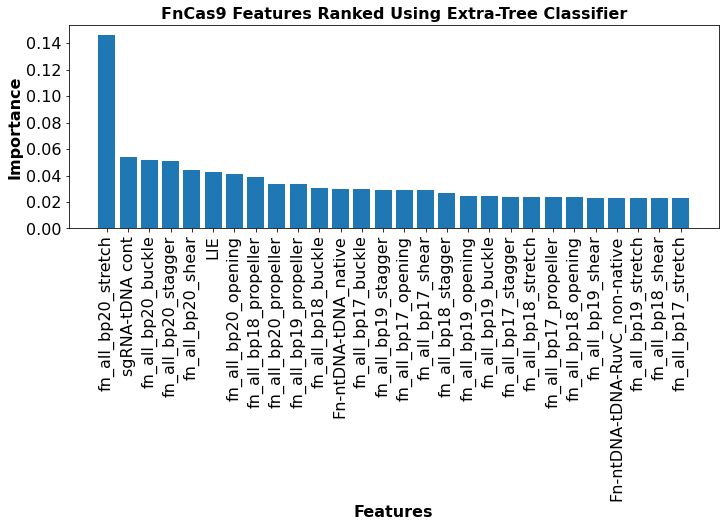

In [21]:
# Train the ExtraTreesClassifier model
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Extract feature importances
importances = model.feature_importances_

# Step 5: Visualize the feature importances
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Features" ,fontsize=16, fontweight='bold')
plt.ylabel("Importance", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.title('FnCas9 Features Ranked Using Extra-Tree Classifier', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('../../figures/FnCas9_extra-tree-feature-ranking_dna_plot.svg')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Select the top 25 features
top_features = X.columns[indices][:5]
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]



# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=100)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|███████████████▌                                                              | 1/5 [00:58<03:52, 58.14s/it]

Best parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best score for RandomForestClassifier: 0.8937212070561961



Grid Search Progress:  40%|██████████████████████████████▊                                              | 2/5 [10:14<17:34, 351.36s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.8932412051298977



Grid Search Progress:  60%|██████████████████████████████████████████████▏                              | 3/5 [10:29<06:34, 197.45s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 200}
Best score for AdaBoostClassifier: 0.8762720278585107



Grid Search Progress:  80%|█████████████████████████████████████████████████████████▌              | 4/5 [3:09:43<1:12:45, 4365.34s/it]

Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVC: 0.8937212300980397



Grid Search Progress: 100%|██████████████████████████████████████████████████████████████████████████| 5/5 [3:11:17<00:00, 2295.46s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score for XGBClassifier: 0.8939612224204974



In [23]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Precision: 0.883796440709871
Gradient Boosting Precision: 0.8775644783864901
AdaBoost Precision: 0.7881090352639905
Support Vector Machine Precision: 0.798492730463221
XGBoost Precision: 0.8729579825673276
Random Forest Recall: 0.893721198156682
Gradient Boosting Recall: 0.8940092165898618
AdaBoost Recall: 0.8800883256528418
Support Vector Machine Recall: 0.8931451612903226
XGBoost Recall: 0.8942012288786483
Random Forest F1-score: 0.8447824859747145
Gradient Boosting F1-score: 0.8473556228428919
AdaBoost F1-score: 0.8295140788460013
Support Vector Machine F1-score: 0.8430157147292741
XGBoost F1-score: 0.8471777447553985
Random Forest Accuracy: 0.893721198156682
Gradient Boosting Accuracy: 0.8940092165898618
AdaBoost Accuracy: 0.8800883256528418
Support Vector Machine Accuracy: 0.8931451612903226
XGBoost Accuracy: 0.8942012288786483


In [24]:
grid_et_dna_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_et_dna_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_et_dna_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_et_dna_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
et_dna=pd.DataFrame(list(zip(models,grid_et_dna_accuracy,grid_et_dna_precision,grid_et_dna_recall, grid_et_dna_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
et_dna.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.893721,0.883796,0.893721,0.844782
1,Gradient Boosting,0.894009,0.877564,0.894009,0.847356
2,ADA Boosting,0.880088,0.788109,0.880088,0.829514
3,Support-vector Machine,0.893145,0.798493,0.893145,0.843016
4,XG-Boost,0.894201,0.872958,0.894201,0.847178


In [25]:
X_train_scaled

array([[-4.06375154, -1.78134421,  0.25674301, -0.40996897,  0.11659582],
       [ 0.03893441, -0.33416915, -0.36078613, -0.98589164, -0.06502367],
       [ 0.30038815,  0.63061423, -0.94891121,  0.19894643,  1.46106069],
       ...,
       [ 0.70380523,  0.83735352, -0.6836089 ,  0.00479687,  1.24425028],
       [ 0.1466402 , -1.88471386,  0.80962565,  0.92551176,  0.37512035],
       [-0.2858273 ,  0.66507078, -0.55046024, -0.38984703, -1.1765418 ]])